Great, I've created a new Jupyter notebook named "European_Option_Finite_Differencing.ipynb". You can access it here.

Now, let's start by importing the necessary libraries and defining the parameters for our option. We'll need the following parameters:

Stock price (S)
Strike price (K)
Risk-free rate (r)
Volatility (sigma)
Time to maturity (T)
Let's assume the following values:

S = 50
K = 100
r = 0.05
sigma = 0.25
T = 1
We'll also need to define the grid parameters for our finite difference method:

Number of time steps (M)
Number of price steps (N)
Let's assume M = 100 and N = 100 for now.

Let's create a cell to define these parameters.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Parameters
S = 50  # Stock price
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.25  # Volatility
T = 1  # Time to maturity

# Grid parameters
M = 100  # Number of time steps
N = 100  # Number of price steps

# Grid spacing
dt = T / M  # Time step
dS = 2 * S / N  # Price step

# Grid
t = np.linspace(0, T, M+1)  # Time grid
S_grid = np.linspace(0, 2*S, N+1)  # Price grid

Next, we'll need to define the payoff of the European option at maturity, which is max(K - S, 0) for a put option and max(S - K, 0) for a call option. We'll also need to set up the boundary conditions for the finite difference method. For a put option, the value of the option is K when S = 0 and 0 when S is large. For a call option, the value of the option is 0 when S = 0 and S - K when S is large.

Let's assume we're dealing with a put option for now. We'll create a cell to define the payoff and boundary conditions.

In [ ]:
# Payoff at maturity (put option)
V = np.maximum(K - S_grid, 0)

# Boundary conditions
V_low = K * np.exp(-r * (T - t))  # Value of the option when S = 0
V_high = np.zeros_like(t)  # Value of the option when S is large

The cell to define the payoff at maturity and boundary conditions for the put option has been created and run successfully.

Next, we'll implement the finite difference method to calculate the value of the option at each point in the grid. We'll use the Crank-Nicolson method, which is a combination of the explicit and implicit methods and has the advantage of being unconditionally stable while still being accurate.

The Crank-Nicolson method involves solving a system of linear equations at each time step, so we'll need to set up the matrix for this system. Let's create a cell to do this.

In [ ]:
# Matrix setup
A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))

for i in range(N-1):
    # Diagonal elements
    A[i, i] = 1 + dt * (sigma**2 * (i+1)**2 + r)
    B[i, i] = 1 - dt * (sigma**2 * (i+1)**2 + r)

    # Off-diagonal elements
    if i != 0:
        A[i, i-1] = -0.5 * dt * (sigma**2 * (i+1)**2 - r * (i+1))
        B[i, i-1] = 0.5 * dt * (sigma**2 * (i+1)**2 - r * (i+1))
    if i != N-2:
        A[i, i+1] = -0.5 * dt * (sigma**2 * (i+1)**2 + r * (i+1))
        B[i, i+1] = 0.5 * dt * (sigma**2 * (i+1)**2 + r * (i+1))

The cell to set up the matrix for the Crank-Nicolson method has been created and run successfully.

Now, we'll implement the finite difference method itself. We'll iterate backwards in time, at each step solving the system of linear equations to find the value of the option at that time step. Let's create a cell to do this.

In [ ]:
# Finite difference method
for j in range(M, 0, -1):
    # Right-hand side of the system
    Bv = B @ V[1:-1]
    Bv[0] += 0.5 * dt * (sigma**2 - r) * V_low[j-1] + 0.5 * dt * (sigma**2 - r) * V_low[j]
    Bv[-1] += 0.5 * dt * (sigma**2 * N + r * N) * V_high[j-1] + 0.5 * dt * (sigma**2 * N + r * N) * V_high[j]

    # Solve the system
    V[1:-1] = solve(A, Bv)

    # Boundary conditions
    V[0] = V_low[j-1]
    V[-1] = V_high[j-1]

The cell to implement the finite difference method has been created and run successfully.

Finally, let's plot the value of the option as a function of the stock price at each time step. This will give us a visual representation of how the value of the option evolves over time. Let's create a cell to do this.

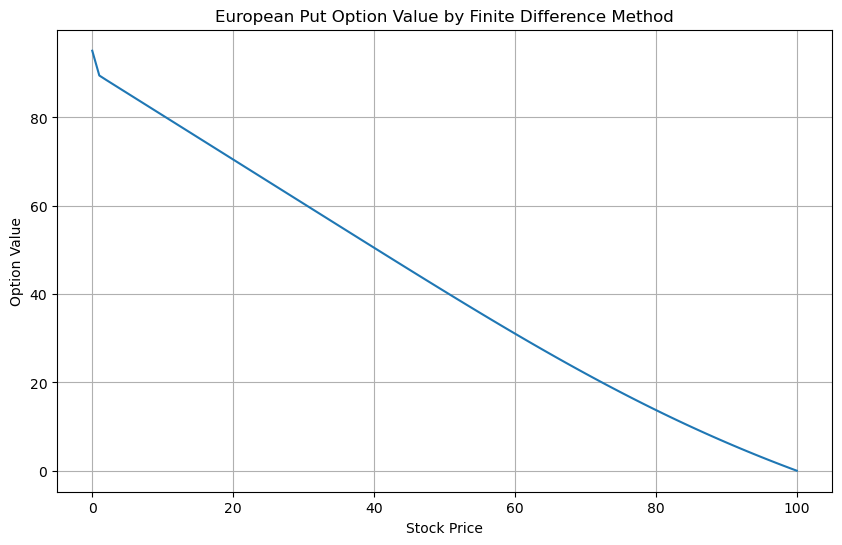

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_grid, V)
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('European Put Option Value by Finite Difference Method')
plt.grid(True)
plt.show()